In [ ]:
# Requirements : 
#   pip install -Iv ipywidgets==7.7.2

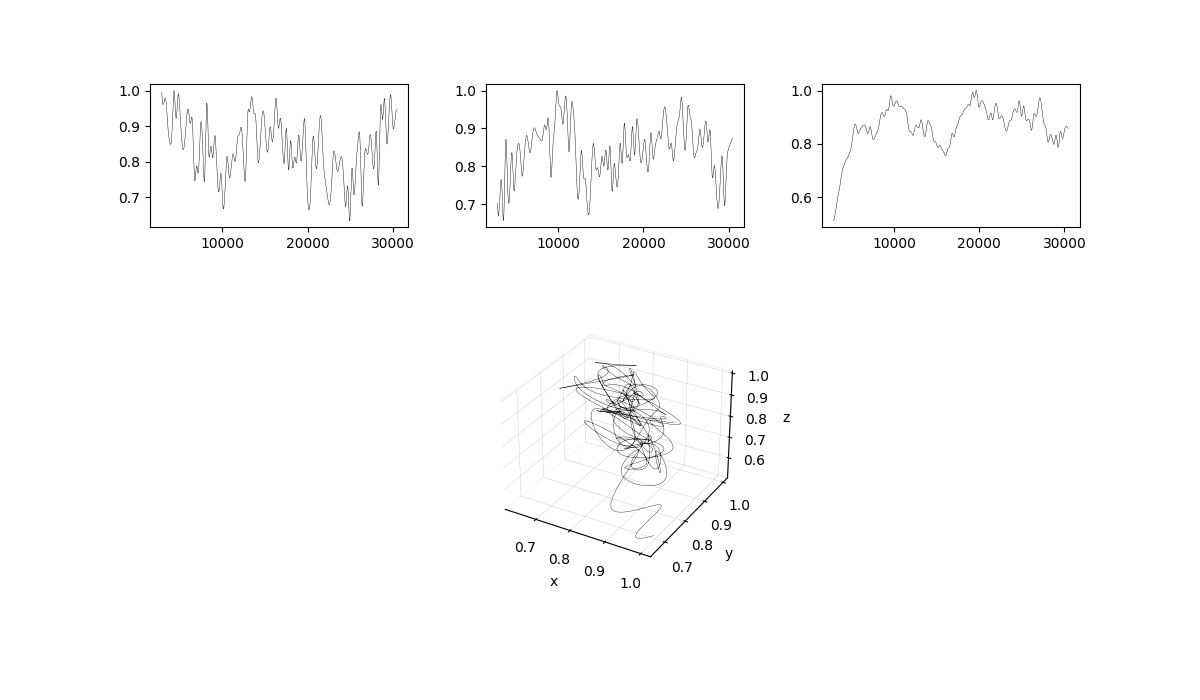

In [20]:
# Aggregat three timeseries to one 3D attraktor

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec

#data = np.loadtxt("OEE_over_time2.txt")
filename = "aggregat_ssop"


data = np.loadtxt("data/" + filename +".txt", skiprows=12)

x = data[:, :4]
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(7)
# set width of each subplot as 8
fig.set_figwidth(12) 

spec = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1,1,1], wspace=0.3,
                         hspace=0.15, height_ratios=[1,2.5])
# fig.set_figwidth(18)
# fig.set_figheight(8)
# system = [1,2,3]
time = [x[0] for x in data]
# Define a new set of time points for interpolation
new_time = np.linspace(min(time), max(time), num=1000, endpoint=False)

x = np.array([])
spec_i = 0
system = [1,2,3]
for n in system:
    # Interpolate
    values = [x[n] for x in data]
    # Create a non-linear interpolation function using a cubic spline
    interp_func = interp1d(time, values, kind='cubic')
    # Use the interpolation function to estimate new values
    new_values = interp_func(new_time)
    new_values = new_values / new_values.max(axis=0)
    if(x.size == 0):
        x = new_values
    else:
        x = np.column_stack([x, new_values])
        #x = np.append(x, new_values, axis=1)
    # Plot the reconstructed attractor
    ax2d = fig.add_subplot(spec[spec_i])
    # ax2d2 = fig.add_subplot(spec[3+spec_i])
    spec_i = spec_i + 1
    #Styling
    new_values = new_values / new_values.max(axis=0)
    ax2d.plot(new_time, new_values, "k", lw=0.3)
    # rounded_embeddings = np.round(embeddings, 2)
    # np.savetxt(str(n)+".txt", rounded_embeddings, fmt='%s')

ax = fig.add_subplot(spec[4], projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis._axinfo["grid"].update({"linewidth":0.2})
ax.yaxis._axinfo["grid"].update({"linewidth":0.2})
ax.zaxis._axinfo["grid"].update({"linewidth":0.2})
ax.grid(which='major', color='#EBEBEB', linewidth=0.01)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x[:, 0], x[:, 1], x[:, 2], linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")

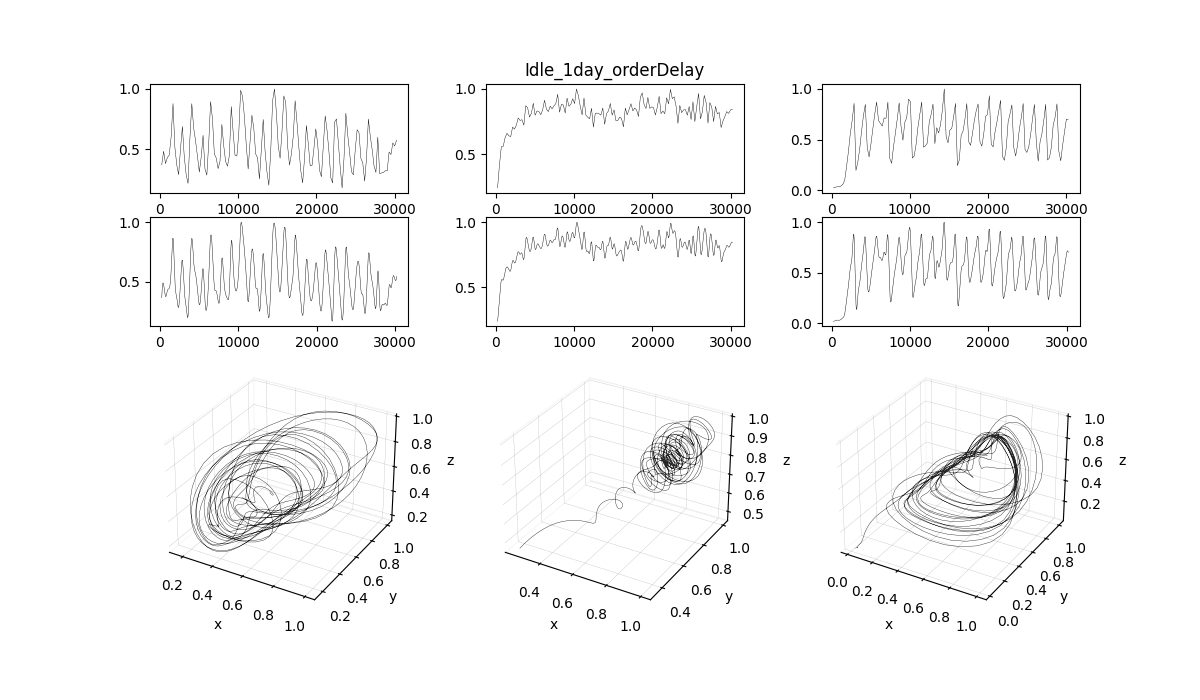

In [19]:
# Create one 3D attraktor form 2D timeseries with time embedding

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec

#data = np.loadtxt("OEE_over_time2.txt")
filename = "Idle_1day_orderDelay"


data = np.loadtxt("data/" + filename + ".txt", skiprows=1)

x = data[:, :4]
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(7)
# set width of each subplot as 8
fig.set_figwidth(12) 

spec = gridspec.GridSpec(ncols=3, nrows=3,
                         width_ratios=[1,1,1], wspace=0.3,
                         hspace=0.15, height_ratios=[1,1,2.5])
# fig.set_figwidth(18)
# fig.set_figheight(8)
# system = [1,2,3]
spec_i = 0
system = [1,2,3]
for n in system:
    # Interpolate
    time = [x[0] for x in data]
    values = [x[n] for x in data]

    # Define a new set of time points for interpolation
    new_time = np.linspace(min(time), max(time), num=1000, endpoint=False)

    # Create a non-linear interpolation function using a cubic spline
    interp_func = interp1d(time, values, kind='cubic')

    # Use the interpolation function to estimate new values
    new_values = interp_func(new_time)
    x = new_values

    # Define embedding parameters
    embedding_dim = 3   # Embedding dimension
    embedding_delay = 5 # Time delay

    # Create embedding matrix
    embeddings = np.empty((len(x)-(embedding_dim-1)*embedding_delay, embedding_dim))
    for i in range(embedding_dim):
        embeddings[:, i] = x[i*embedding_delay:i*embedding_delay+len(embeddings)]

    # Plot the reconstructed attractor
    ax = fig.add_subplot(spec[6+spec_i], projection='3d')
    ax2d = fig.add_subplot(spec[spec_i])
    ax2d2 = fig.add_subplot(spec[3+spec_i])
    spec_i = spec_i + 1
    #Styling
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.yaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.grid(which='major', color='#EBEBEB', linewidth=0.01)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Normalizing
    embeddings = embeddings / embeddings.max(axis=0)
    ax.plot(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
    x =  np.array(values)
    x = x / x.max(axis=0)
    new_values = new_values / new_values.max(axis=0)
    ax2d.plot(time, x, "k", lw=0.3)
    ax2d2.plot(new_time, new_values, "k", lw=0.3)  
    rounded_embeddings = np.round(embeddings, 2)
    if(spec_i==2):
        ax2d.set_title(filename)
    # np.savetxt(str(n)+".txt", rounded_embeddings, fmt='%s')

In [ ]:
# Create one 3D attraktor form 2D timeseries with Spectral Embedding
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.manifold import SpectralEmbedding
from scipy.interpolate import interp1d

n_components = 3
n_neighbors = 100
t_affinity = "nearest_neighbors"

data = np.loadtxt("data/" + "Idle_1day_orderDelay.txt", skiprows=1)

x = data[:, :4]
FIG_SIZE = (10,3)

fig = plt.figure(figsize=FIG_SIZE, dpi=150)
#fig.set_figwidth(10)
#fig.set_figheight(10)
# system = [1,2,3]
system = [1,2,3]
for n in system:
    # Interpolate
    time = [x[0] for x in data]
    values = [x[n] for x in data]

    # Define a new set of time points for interpolation
    new_time = np.linspace(min(time), max(time), num=1000, endpoint=False)
    # Create a non-linear interpolation function using a cubic spline
    interp_func = interp1d(time, values, kind='cubic')
    # Use the interpolation function to estimate new values
    new_values = interp_func(new_time)

    #x = values
    x = new_values
    embedding_dim = 3   # Embedding dimension
    embedding_delay = 2 # Time delay

    # Create embedding matrix
    embeddings = np.empty((len(x)-(embedding_dim-1)*embedding_delay, embedding_dim))
    for i in range(embedding_dim):
        embeddings[:, i] = x[i*embedding_delay:i*embedding_delay+len(embeddings)]
   
    t_total = []
    t_total = np.array(embeddings)

    # Fit the attractor
    t_se = SpectralEmbedding(n_components=n_components, affinity= t_affinity, n_neighbors=n_neighbors, n_jobs=-1)
    t_se_data = t_se.fit_transform(X=t_total)
    t_se_data = t_se_data*1000

    #Plot Spectral Embedding
    ax = Axes3D(fig)
    ax = fig.add_subplot(1, 3, n, projection="3d")
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.yaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.2})
    ax.grid(which='major', color='#EBEBEB', linewidth=0.01)

    
    # ax.view_init(15,25)
    c_map = plt.get_cmap("Greys")
        
    # ax.scatter(xs=t_se_data[:, 0], ys=t_se_data[:, 1], zs=t_se_data[:,2], marker="+", c= t_total[:, 0], cmap=c_map, vmin=min(t_total[:, 2]), vmax=max(t_total[:, 2]), s=1)
    ax.plot(xs=t_se_data[:, 0], ys=t_se_data[:, 1], zs=t_se_data[:,2], linewidth=0.2, alpha=0.85, color="black")
    # embeddings = t_se_data / t_se_data.max(axis=0)
    rounded_embeddings = np.round(t_se_data, 2)
    np.savetxt(str(n)+"a.txt", rounded_embeddings, fmt='%s')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


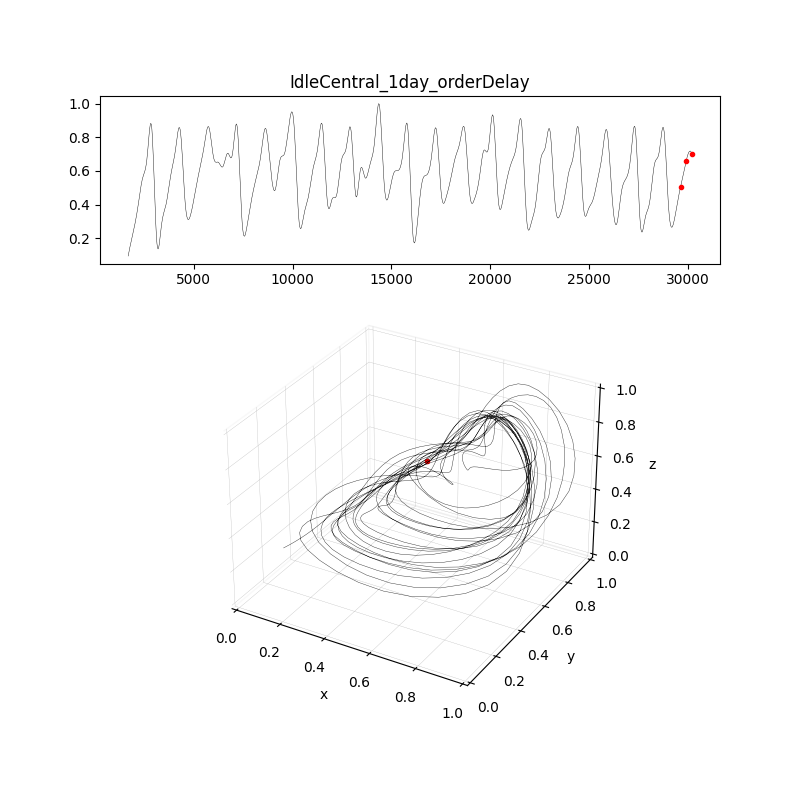

In [33]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec


# create a figure
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(8) 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.0,
                         hspace=0.1, height_ratios=[1,2.5])

axl = fig.add_subplot(spec[0])
axr = fig.add_subplot(spec[1], projection='3d', adjustable='box')

# Setting the axes properties
axr.xaxis.pane.fill = False
axr.yaxis.pane.fill = False
axr.zaxis.pane.fill = False
axr.xaxis._axinfo["grid"].update({"linewidth":0.2})
axr.yaxis._axinfo["grid"].update({"linewidth":0.2})
axr.zaxis._axinfo["grid"].update({"linewidth":0.2})
axr.grid(which='major', color='#EBEBEB', linewidth=0.01)
axr.set_xlabel('x')
axr.set_ylabel('y')
axr.set_zlabel('z')
axr.set_xlim3d([0.0, 1.0])
axr.set_ylim3d([0.0, 1.0])
axr.set_zlim3d([0.0, 1.0])
# data
filename = "IdleCentral_1day_orderDelay"
axl.set_title(filename)
filedata = np.loadtxt("data/" + "IdleCentral_1day_orderDelay" + ".txt")
n = 1 # data colum 
time = [x[0] for x in filedata]
values = [x[n] for x in filedata]

# Define a new set of time points for interpolation
new_time = np.linspace(min(time), max(time), num=1000, endpoint=False)
# Create a non-linear interpolation function using a cubic spline
interp_func = interp1d(time, values, kind='cubic')
# Use the interpolation function to estimate new values
new_values = interp_func(new_time)
x = new_values
# Define embedding parameters
embedding_dim = 3   # Embedding dimension
embedding_delay = 5 # Time delay
# Create embedding matrix
embeddings = np.empty((len(x)-(embedding_dim-1)*embedding_delay, embedding_dim))
for i in range(embedding_dim):
    embeddings[:, i] = x[i*embedding_delay:i*embedding_delay+len(embeddings)]

embeddings = embeddings / embeddings.max(axis=0)
data = embeddings.transpose()

# left plot
x = x / x.max(axis=0)
axl.plot(new_time, x, "k", lw=0.3)
point, = axl.plot(new_time[0], x[0], "o", markersize=3, color='red')
point2, = axl.plot(new_time[embedding_delay], x[embedding_delay], "o", markersize=3, color='red')
point3, = axl.plot(new_time[embedding_delay*2], x[embedding_delay*2], "o", markersize=3, color='red')
point4, = axr.plot(data[0,0], data[1,0], data[2,0], "o", markersize=3, color='red')
#axr.plot(data[0,0], data[1,0], data[2,0], "l", lw=0.3)
#point2, = axr.plot(data[0,0], data[1,0], data[2,0], "o", markersize=3, color='red')

def update(num, data, line):
    point.set_data([new_time[num]], [x[num]])
    point2.set_data([new_time[num+10]], [x[num+10]])
    point3.set_data([new_time[num+20]], [x[num+20]])
    point4.set_data([data[0,num]], [data[1,num]])
    point4.set_3d_properties(data[2, num], 'z')
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    return point, line, point2, point3# , point4
    
# ax.plot(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
line, = axr.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth=0.3, alpha=0.85, color="black")
ani = animation.FuncAnimation(fig, update, 980, interval=20, blit=False, repeat=False, fargs=(data, line))
ani.save(filename + '.gif', writer='imagemagick')
# fig.tight_layout()
plt.show()

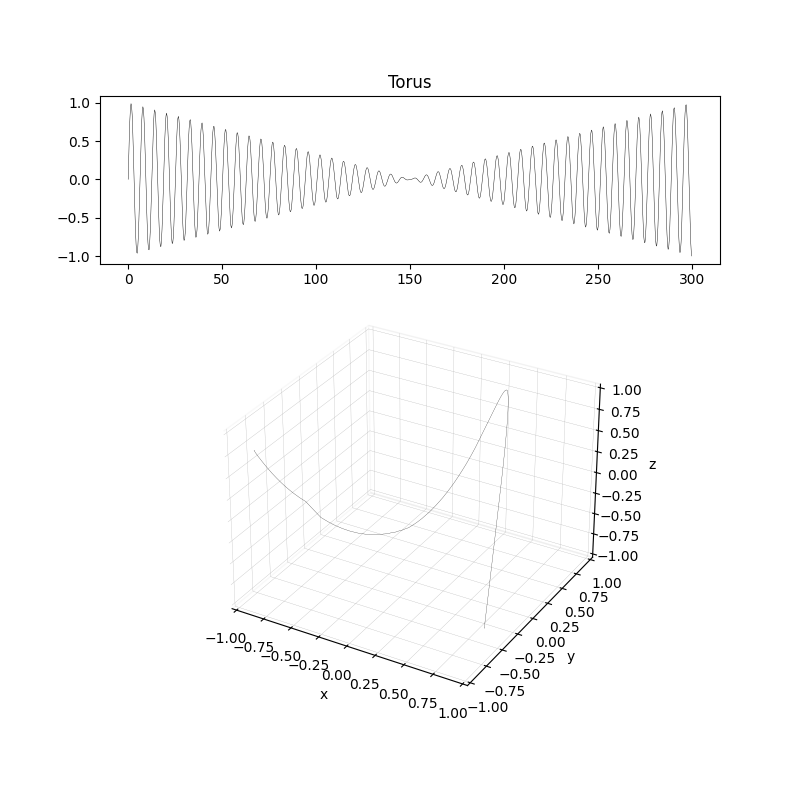

In [5]:
%matplotlib widget

# Synthetic Attractor

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import matplotlib.gridspec as gridspec
from sklearn.manifold import SpectralEmbedding


animated = False
spectral = True # False does Standard Embedding

# Define spectral settings
n_components = 3
n_neighbors = 250
t_affinity = "nearest_neighbors"

# Define embedding settings
embedding_dim = 3   # Embedding dimension
embedding_delay = 150 # Time delay

### Begin settings for output.
# create a figure
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(8) 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.0,
                         hspace=0.1, height_ratios=[1,2.5])

axl = fig.add_subplot(spec[0])
axr = fig.add_subplot(spec[1], projection='3d', adjustable='box')

# Setting the axes properties
axr.xaxis.pane.fill = False
axr.yaxis.pane.fill = False
axr.zaxis.pane.fill = False
axr.xaxis._axinfo["grid"].update({"linewidth":0.2})
axr.yaxis._axinfo["grid"].update({"linewidth":0.2})
axr.zaxis._axinfo["grid"].update({"linewidth":0.2})
axr.grid(which='major', color='#EBEBEB', linewidth=0.01)
axr.set_xlabel('x')
axr.set_ylabel('y')
axr.set_zlabel('z')
axr.set_xlim3d([-1.0, 1.0])
axr.set_ylim3d([-1.0, 1.0])
axr.set_zlim3d([-1.0, 1.0])
# data
filename = "Torus"

axl.set_title(filename)
#filedata = np.loadtxt("IdleCentral_1day_orderDelay" + ".txt")
n = 1 # data colum 
# time = [x[0] for x in filedata]
# values = [x[n] for x in filedata]
time = np.linspace(0,300,num=1000)
forward = np.array([x for x in range(1,501)])
backward = np.flip(forward)
full = np.append(backward,forward)
full = full / full.max(axis=0)

x = np.linspace(0,3000,1)
x = np.sin(time)
x = np.array(full * x)

if(spectral):  # Create Spectral Attractor
    t_total = np.column_stack((time, x))
    # Fit the attractor
    t_se = SpectralEmbedding(n_components=n_components, affinity= t_affinity, n_neighbors=n_neighbors, n_jobs=-1)
    t_se_data = t_se.fit_transform(X=t_total)
    data = t_se_data * 1000
    data = data / data.max(axis=0)
else: # Create embedding matrix
    embeddings = np.empty((len(x)-(embedding_dim-1)*embedding_delay, embedding_dim))
    for i in range(embedding_dim):
        embeddings[:, i] = x[i*embedding_delay:i*embedding_delay+len(embeddings)]

    embeddings = embeddings / embeddings.max(axis=0)
    data = embeddings.transpose()

# left plot
# x = x / x.max(axis=0)
axl.plot(time, x, "k", lw=0.3)
if(animated):
    point, = axl.plot(time[0], x[0], "o", markersize=3, color='red')
    point2, = axl.plot(time[embedding_delay], x[embedding_delay], "o", markersize=3, color='red')
    point3, = axl.plot(time[embedding_delay*2], x[embedding_delay*2], "o", markersize=3, color='red')
    point4, = axr.plot(data[0,0], data[1,0], data[2,0], "o", markersize=3, color='red')
#axr.plot(data[0,0], data[1,0], data[2,0], "l", lw=0.3)
#point2, = axr.plot(data[0,0], data[1,0], data[2,0], "o", markersize=3, color='red')

def update(num, data, line):
    point.set_data([time[num]], [x[num]])
    point2.set_data([time[num+10]], [x[num+10]])
    point3.set_data([time[num+20]], [x[num+20]])
    point4.set_data([data[0,num]], [data[1,num]])
    point4.set_3d_properties(data[2, num], 'z')
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    return point, line, point2, point3# , point4
    
if(animated):
    line, = axr.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth=0.3, alpha=0.85, color="black")
    ani = animation.FuncAnimation(fig, update, 980, interval=200, blit=False, repeat=False, fargs=(data, line))
else:
    axr.plot(xs=data[:, 0], ys=data[:, 1], zs=data[:,2], linewidth=0.2, alpha=0.85, color="black")

# ani.save(filename + '.gif', writer='imagemagick')
# fig.tight_layout()
plt.show()